# Housing Price Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
prices = pd.read_csv('../../data/Ames_Housing_Price_Data.csv',index_col = 0)
#estate = pd.read_csv('../../data/Ames_Real_Estate_Data.csv')

In [2]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [3]:
prices.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [4]:
#Creating a price per square foot column to help with feature engineering
prices['Price_sqft'] = prices['SalePrice']/prices['GrLivArea']

# Converting quality/condition categoricals to numerical

In [5]:
def ordinal_scale(Series):
    return prices[Series].replace({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

prices['KitchenQual'] = ordinal_scale('KitchenQual')
prices['ExterQual'] = ordinal_scale('ExterQual')
prices['ExterCond'] = ordinal_scale('ExterCond')
prices['HeatingQC'] = ordinal_scale('HeatingQC')

In [6]:
def impute_ordinals(Series):
    '''
    Returns a pandas series containing null values and converting to numerical, ordered by median price per sqft.
    
    Args:
    

    Series: str, column name in the pandas dataframe.
    '''
    prices[Series].fillna('DNE',inplace = True)
    ords = prices.groupby(Series)['Price_sqft'].median().sort_values().reset_index()
    ords = list(ords[Series])
    impute = dict()
    for i, j in enumerate(ords):
        impute[j] = i
    prices[Series].replace(impute, inplace = True)
    return prices[Series]


In [7]:
impute_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
              'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence']

for i in impute_cols:
    prices[i] = impute_ordinals(i)

In [8]:
prices[['Alley','BsmtQual','PoolQC','GarageFinish']].head()

,Alley,BsmtQual,PoolQC,GarageFinish
1,1,3,2,1
2,1,4,2,3
3,1,3,2,1
4,1,2,2,1
5,1,4,2,3


In [9]:
prices['MiscFeature'].fillna(0,inplace = True)
prices['MiscFeature'] = prices['MiscFeature'].apply(lambda M: 1 if M !=0 else M)
prices['CentralAir'].replace({'N':0,'Y':1},inplace = True)
prices['Street'].replace({'Grvl':1,'Pave':0},inplace = True)
prices['PavedDrive'].replace({'Y':1,'P':0.5,'N':0},inplace = True)
prices['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},inplace = True)

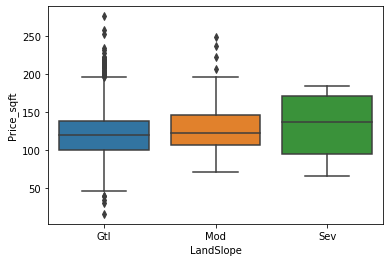

In [10]:
def cat_boxplots(Series):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.boxplot(data = prices, x = Series,y = 'Price_sqft')
    
cat_boxplots('LandSlope')

In [11]:
new_prices = prices.copy()
new_prices = new_prices.loc[~new_prices['Neighborhood'].isin(['Landmrk','Greens','GrnHill'])]

In [12]:
na_col = new_prices.isnull().sum()
na_col[na_col>0]

LotFrontage     458
MasVnrType       14
MasVnrArea       14
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     129
GarageCars        1
GarageArea        1
dtype: int64

In [13]:
def check_frontage(boro):
    x = prices['LotFrontage'].loc[prices['Neighborhood']==boro]
    return plt.hist(x)

(array([ 2.,  3.,  8., 30., 15., 14.,  9.,  5.,  2.,  2.]),
 array([ 40.,  48.,  56.,  64.,  72.,  80.,  88.,  96., 104., 112., 120.]),
 <BarContainer object of 10 artists>)

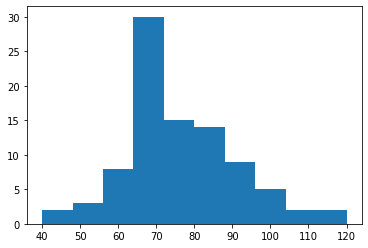

In [14]:
check_frontage('Sawyer')

## Reducing to numeric features

In [15]:
#impute lot frontage based off the mean of the respective neighborhood
new_prices['LotFrontage'] = new_prices['LotFrontage'].fillna(new_prices.groupby('Neighborhood')['LotFrontage'].transform('mean'))

In [16]:
len(new_prices.columns[prices.dtypes == object])

21

# Selecting numerical variables for multiple linear regression

In [17]:
numeric_features = new_prices.select_dtypes(include = np.number)
print(numeric_features.isnull().sum())

# imputing remaining numerical features with the mean
numeric_features_filled = numeric_features.apply(lambda x: x.fillna(x.mean()))
y_price = np.log(numeric_features_filled['SalePrice'])
numeric_features_filled.drop(['PID','SalePrice','Price_sqft'], axis = 1, inplace = True)

PID            0
GrLivArea      0
SalePrice      0
MSSubClass     0
LotFrontage    0
              ..
MiscFeature    0
MiscVal        0
MoSold         0
YrSold         0
Price_sqft     0
Length: 61, dtype: int64


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features_filled.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features_filled.values, i) for i in range(len(numeric_features_filled.columns))]

/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [19]:
vifs = np.array(vif_data['VIF'])
bad_vifs = np.where(vifs>=5)


post_vifs = numeric_features_filled.drop(numeric_features_filled.columns[bad_vifs],axis = 1)

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(post_vifs, y_price)

In [20]:
from sklearn.linear_model import LinearRegression
vif_reg = LinearRegression()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [21]:
vif_reg.fit(Xtrain,ytrain)
vif_reg.score(Xtest,ytest)

0.5305454142727795

Text(0.5, 1.0, 'Average price per sqft by neighborhood')

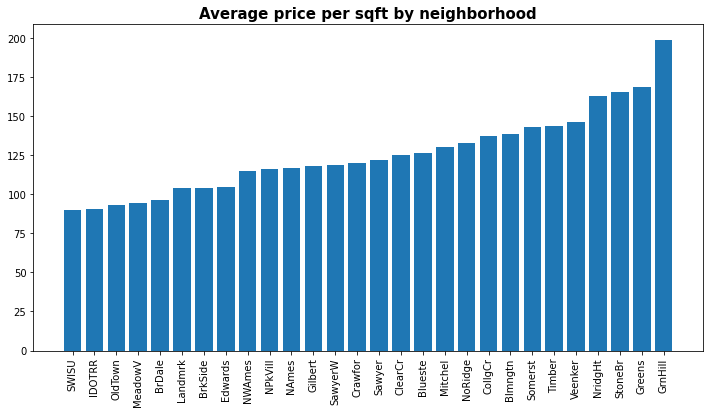

In [22]:
boro = prices.groupby('Neighborhood')[['Price_sqft']].mean()
boro = boro.reset_index().sort_values(by = 'Price_sqft')
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.bar(x = boro.Neighborhood, height = boro.Price_sqft)
plt.xticks(rotation = 90)
plt.title('Average price per sqft by neighborhood', fontsize = 15, fontweight = 'bold')

<AxesSubplot:>

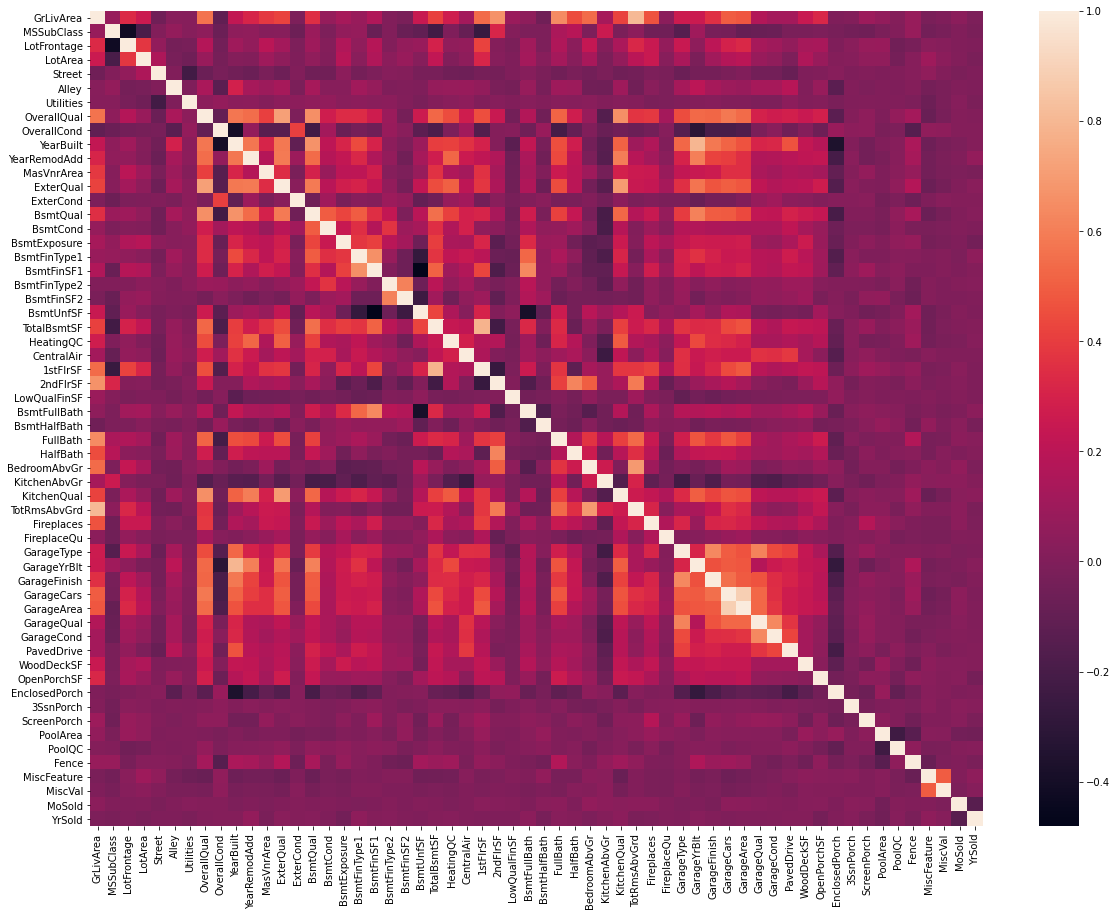

In [23]:
plt.figure(figsize = (20,15))
sns.heatmap(numeric_features_filled.corr())

In [24]:
r_prices = new_prices.corr()
r_prices = r_prices[['SalePrice']][1:]

<AxesSubplot:>

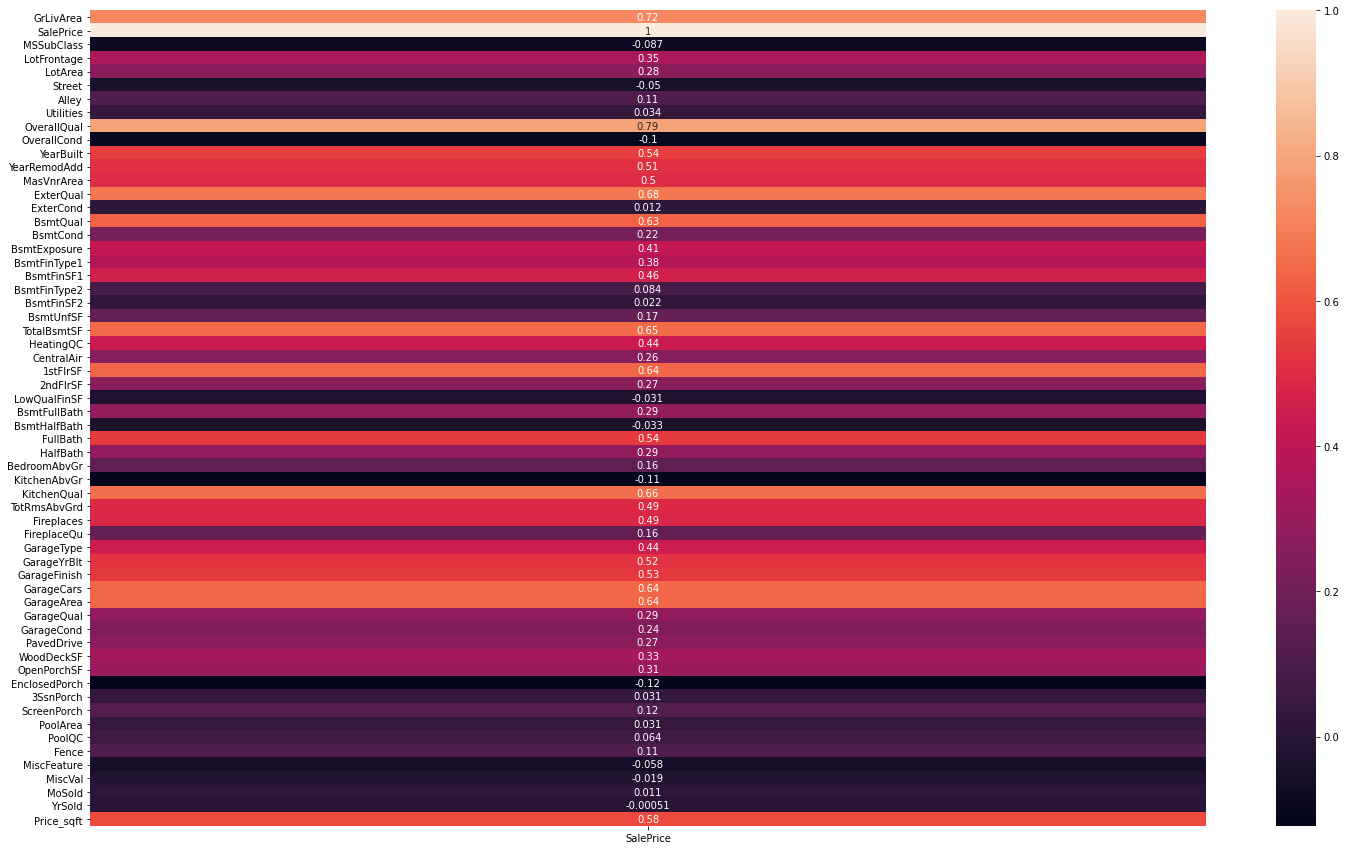

In [25]:
plt.figure(figsize = (25,15))
sns.heatmap(r_prices,annot = True)

In [26]:
# numeric_features_filled.drop('Price_sqft',axis = 1, inplace = True)
numeric_features_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 1 to 763
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2569 non-null   int64  
 1   MSSubClass     2569 non-null   int64  
 2   LotFrontage    2569 non-null   float64
 3   LotArea        2569 non-null   int64  
 4   Street         2569 non-null   int64  
 5   Alley          2569 non-null   int64  
 6   Utilities      2569 non-null   int64  
 7   OverallQual    2569 non-null   int64  
 8   OverallCond    2569 non-null   int64  
 9   YearBuilt      2569 non-null   int64  
 10  YearRemodAdd   2569 non-null   int64  
 11  MasVnrArea     2569 non-null   float64
 12  ExterQual      2569 non-null   int64  
 13  ExterCond      2569 non-null   int64  
 14  BsmtQual       2569 non-null   int64  
 15  BsmtCond       2569 non-null   int64  
 16  BsmtExposure   2569 non-null   int64  
 17  BsmtFinType1   2569 non-null   int64  
 18  BsmtFinSF

In [27]:
prices.loc[prices.Electrical.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price_sqft
626,916386080,1394,167500,80,RL,73.0,9735,0,1,Reg,...,0,2,3,0,0,5,2008,WD,Normal,120.157819


# Distribution of numerical variables

In [28]:
numeric_colnames = numeric_features_filled.columns
len(numeric_colnames)

58

<AxesSubplot:xlabel='OverallCond', ylabel='Count'>

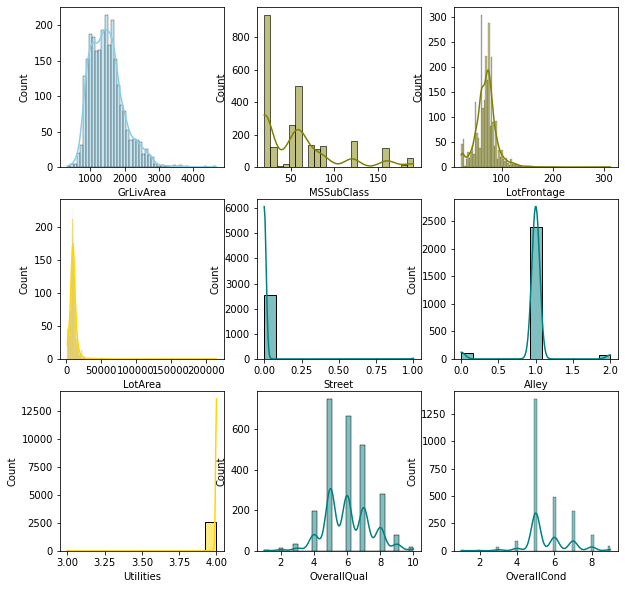

In [29]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot( numeric_features_filled[numeric_colnames[0]] , color="skyblue", ax=axes[0, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[1]] , color="olive", ax=axes[0, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[2]], color="olive", ax=axes[0, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[3]], color="gold", ax=axes[1, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[4]], color="teal", ax=axes[1, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[5]], color="teal", ax=axes[1, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[6]], color="gold", ax=axes[2, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[7]], color="teal", ax=axes[2, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[8]], color="teal", ax=axes[2, 2],kde= True)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='Count'>

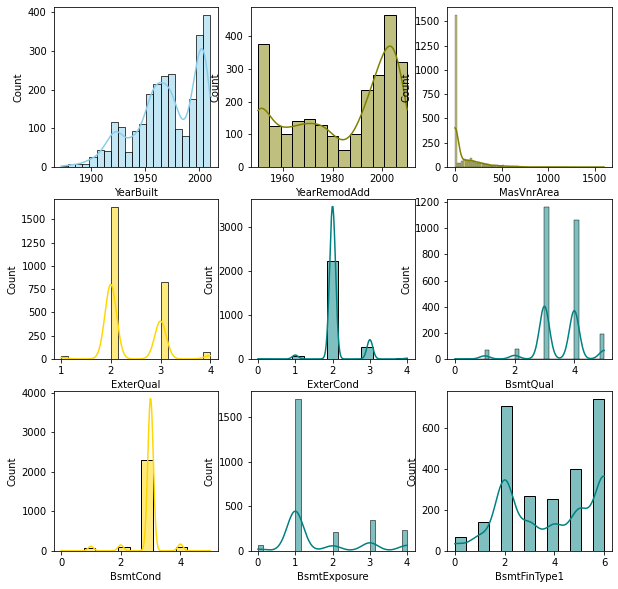

In [30]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot( numeric_features_filled[numeric_colnames[9]] , color="skyblue", ax=axes[0, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[10]] , color="olive", ax=axes[0, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[11]], color="olive", ax=axes[0, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[12]], color="gold", ax=axes[1, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[13]], color="teal", ax=axes[1, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[14]], color="teal", ax=axes[1, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[15]], color="gold", ax=axes[2, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[16]], color="teal", ax=axes[2, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[17]], color="teal", ax=axes[2, 2],kde= True)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Count'>

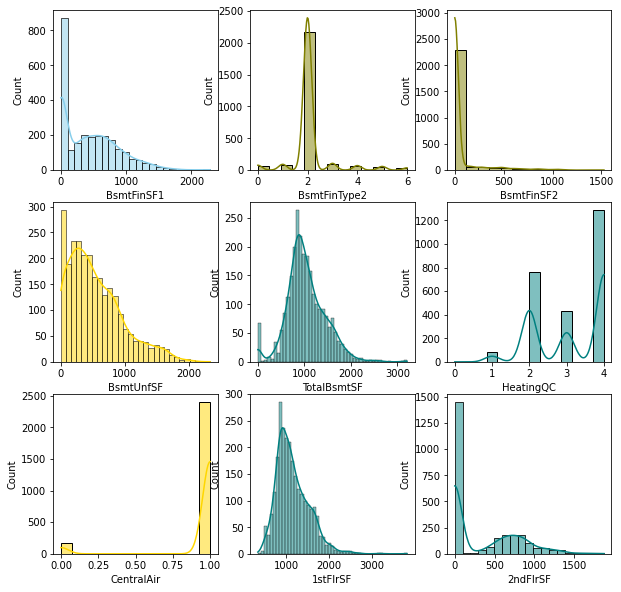

In [31]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot( numeric_features_filled[numeric_colnames[18]] , color="skyblue", ax=axes[0, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[19]] , color="olive", ax=axes[0, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[20]], color="olive", ax=axes[0, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[21]], color="gold", ax=axes[1, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[22]], color="teal", ax=axes[1, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[23]], color="teal", ax=axes[1, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[24]], color="gold", ax=axes[2, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[25]], color="teal", ax=axes[2, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[26]], color="teal", ax=axes[2, 2],kde= True)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

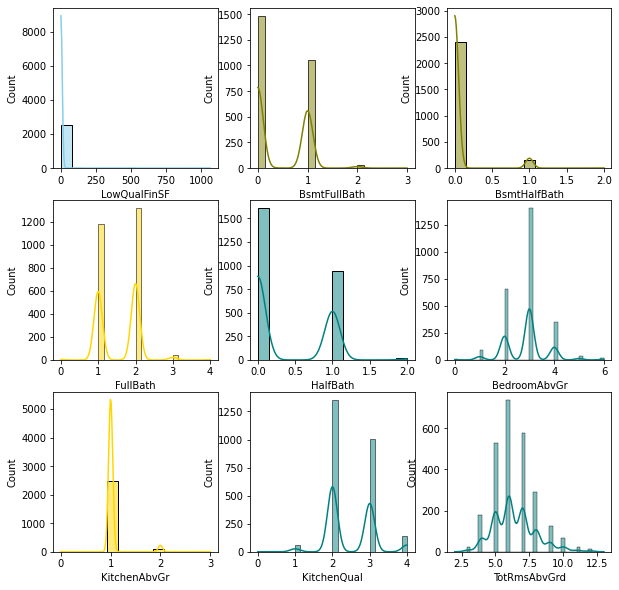

In [32]:
f, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot( numeric_features_filled[numeric_colnames[27]] , color="skyblue", ax=axes[0, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[28]] , color="olive", ax=axes[0, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[29]], color="olive", ax=axes[0, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[30]], color="gold", ax=axes[1, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[31]], color="teal", ax=axes[1, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[32]], color="teal", ax=axes[1, 2],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[33]], color="gold", ax=axes[2, 0],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[34]], color="teal", ax=axes[2, 1],kde= True)
sns.histplot( numeric_features_filled[numeric_colnames[35]], color="teal", ax=axes[2, 2],kde= True)

Median is 159900.0
Mean is 178059.62325581396


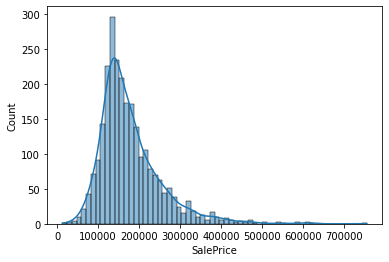

In [33]:
sns.histplot(new_prices.SalePrice,kde = True)
print(f'Median is {np.median(prices.SalePrice)}')
print(f'Mean is {np.mean(prices.SalePrice)}')

### Five fold CV using KFold

<p> Gabi says drop garagecars, garagequal and garagecondition</p>

In [34]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso


Xtrain,Xtest,ytrain,ytest = train_test_split(numeric_features_filled,y_price)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cv = KFold(n_splits = 5, shuffle = True)


from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 3500000)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
# pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])

alphas = np.linspace(.0001,10,500)

cv_res=[]

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    pipe = Pipeline(steps = [('ss',StandardScaler()),('lasso',lasso)])
    cv_res.append(cross_validate(pipe, Xtrain,ytrain,cv = cv, return_train_score = True))

In [35]:
# cv = KFold(n_splits = 5, shuffle = True)


# from sklearn.linear_model import Lasso
# lasso = Lasso(max_iter = 3500000)


# from sklearn.model_selection import cross_validate
# alphas = np.linspace(.0001,10,500)

# cv_res=[]

# for alpha in alphas:
#     lasso.set_params(alpha = alpha)
#     cv_res.append(cross_validate(lasso, Xtrain, ytrain, cv = cv, return_train_score = True))

In [36]:
lasso_test = [i['test_score'].mean() for i in cv_res]
lasso_train = [i['train_score'].mean() for i in cv_res]

In [37]:
alpha_ind = lasso_test.index(max(lasso_test))
f'alpha: {alphas[alpha_ind]}, train_score: {lasso_train[alpha_ind]}, test_score: {lasso_test[alpha_ind]}'

'alpha: 0.0001, train_score: 0.9100204134653807, test_score: 0.8967915042983154'

In [38]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
lasso = Lasso()
lasso.set_params(alpha = alphas[alpha_ind])
lasso.fit(Xtrain,ytrain)

lasso_train_results = lasso.score(Xtrain,ytrain)
lasso_test_results = lasso.score(Xtest,ytest)
print(lasso_train_results)
print(lasso_test_results)

0.9089031436673768
0.9049840135328885


In [39]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

ols.fit(Xtrain,ytrain)

print(f'Lasso training score: {lasso_train_results}')
print(f'Lasso testing score: {lasso_test_results}')
print(f'MLR training score: {ols.score(Xtrain,ytrain)}')
print(f'MLR testing score: {ols.score(Xtest,ytest)}')

from sklearn.metrics import mean_squared_error
y_pred = ols.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred)**0.5
print(f'RMSE: {RMSE}')

Lasso training score: 0.9089031436673768
Lasso testing score: 0.9049840135328885
MLR training score: 0.9089065239101961
MLR testing score: 0.9049661930494316
RMSE: 0.11577377138193265


In [40]:
coefs = lasso.coef_
zero_idx = np.where(coefs == 0)
numeric_features_filled.columns[zero_idx]

Index(['BsmtUnfSF', '2ndFlrSF'], dtype='object')

In [41]:
for col, coef in zip(numeric_features_filled.columns, lasso.coef_):
    print(f'{col}:   {coef}')

GrLivArea:   0.11516451086525299
MSSubClass:   -0.021047935085064768
LotFrontage:   0.009067328615990487
LotArea:   0.021945660717742333
Street:   -0.004426171857653376
Alley:   0.00865842963658031
Utilities:   0.00488903631445686
OverallQual:   0.09020162657584394
OverallCond:   0.050869135193017063
YearBuilt:   0.04619008713643907
YearRemodAdd:   0.010778015413083378
MasVnrArea:   0.0009966172485713454
ExterQual:   0.011888043122806159
ExterCond:   -0.004214731284853924
BsmtQual:   0.022419299642318962
BsmtCond:   -0.0008781520519608986
BsmtExposure:   0.010966469410806963
BsmtFinType1:   0.009946217440045195
BsmtFinSF1:   0.02193474495580338
BsmtFinType2:   -0.0054138412929043665
BsmtFinSF2:   0.010492788126161104
BsmtUnfSF:   -0.0
TotalBsmtSF:   0.026304872320464478
HeatingQC:   0.018943174237673485
CentralAir:   0.011272936522792393
1stFlrSF:   0.011720303151073795
2ndFlrSF:   0.0
LowQualFinSF:   -0.0065662072996520065
BsmtFullBath:   0.011041061967720396
BsmtHalfBath:   0.0006377

# Drop Features Post-lasso

In [42]:
post_lasso = numeric_features_filled.drop(numeric_features_filled.columns[zero_idx],axis = 1)

In [43]:
Xtrain,Xtest,ytrain,ytest = train_test_split(post_lasso,y_price)

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)


ols2 = LinearRegression()
ols2.fit(Xtrain,ytrain)

LinearRegression()

In [44]:
print(f'Post-lasso training score: {ols2.score(Xtrain,ytrain)}')
print(f'Post-lasso testing score: {ols2.score(Xtest,ytest)}')

y_pred = ols2.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred)**0.5
print(f'Post-lasso RMSE: {RMSE}')

Post-lasso training score: 0.921672629892748
Post-lasso testing score: 0.8705206432762386
Post-lasso RMSE: 0.14877778445059534


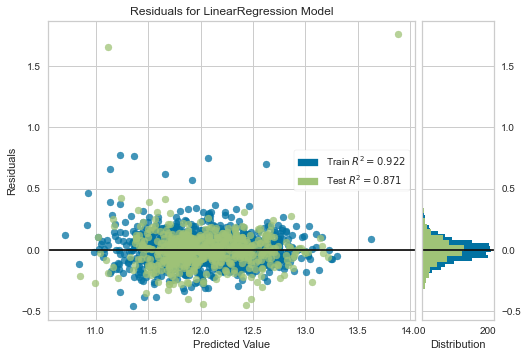

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
from yellowbrick.regressor import ResidualsPlot
ols2 = LinearRegression()
visualizer = ResidualsPlot(ols2)
visualizer.fit(Xtrain, ytrain) 
visualizer.score(Xtest, ytest)  
visualizer.show() 

In [46]:
print(len(prices.columns))
print(len(numeric_features_filled.columns))

82
58


## Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gBoost = GradientBoostingRegressor()

In [48]:
gBoost.fit(Xtrain,ytrain)
print(gBoost.score(Xtrain,ytrain))
print(gBoost.score(Xtest,ytest))

y_pred = gBoost.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred)**0.5
print(f'Gradient Boosting RMSE: {RMSE}')

0.9558093837754783
0.884936438965906
Gradient Boosting RMSE: 0.1402512452175616


<p>After selecting features with lasso, Linear regression R2 was .91, while a default GradientBoostingRegressor yielded .905</p>

# Descriptive Model

In [49]:
for col, coef in zip(post_lasso.columns, ols2.coef_):
    print(f'{col}:   {coef}')

GrLivArea:   0.12981669669023302
MSSubClass:   -0.017736538217992003
LotFrontage:   0.013421287839423854
LotArea:   0.022325938831227125
Street:   -0.007532907962954149
Alley:   0.0072500767780138324
Utilities:   0.0038388786289656474
OverallQual:   0.08046413951115663
OverallCond:   0.05054822317623586
YearBuilt:   0.05655493544621723
YearRemodAdd:   0.010462835398813876
MasVnrArea:   -0.0022541667001459553
ExterQual:   0.010877315409459718
ExterCond:   -0.0054693897443803055
BsmtQual:   0.016541510255738016
BsmtCond:   -0.007337877560269785
BsmtExposure:   0.01163588029804754
BsmtFinType1:   0.013149575363916
BsmtFinSF1:   0.01817936317348883
BsmtFinType2:   -0.003108991304428335
BsmtFinSF2:   0.006857854498321134
TotalBsmtSF:   0.04325122733991797
HeatingQC:   0.017378850688555714
CentralAir:   0.007237502928794503
1stFlrSF:   0.00022884795738121848
LowQualFinSF:   -0.0066958536672306335
BsmtFullBath:   0.010671695349037624
BsmtHalfBath:   -0.0009510514330887121
FullBath:   0.007208

Text(0.5, 1.0, 'Standardized feature betas in log(SalePrice) linear model')

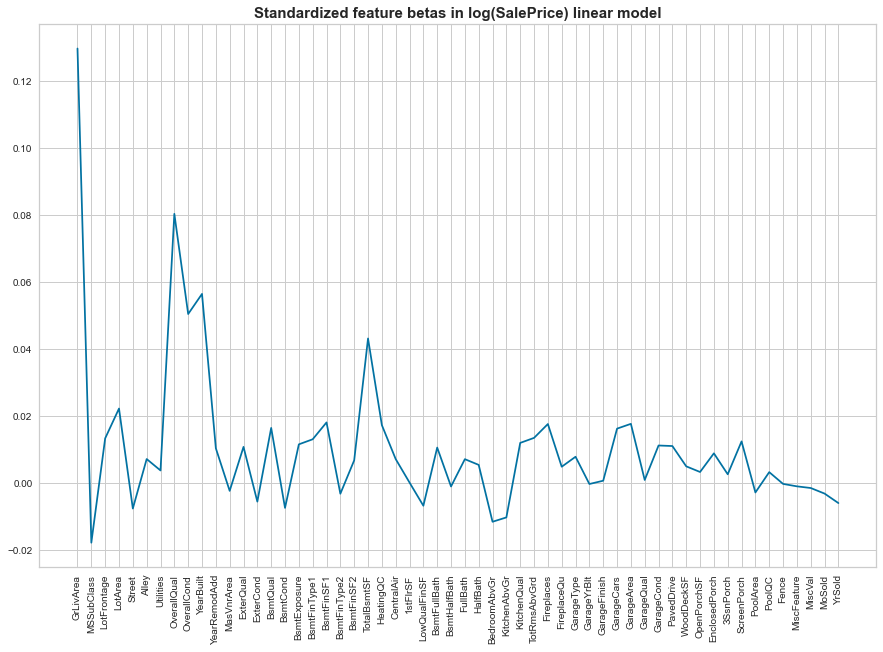

In [50]:
plt.figure(figsize = (15,10))
plt.plot(list(range(len(post_lasso.columns))),ols2.coef_)
plt.xticks(list(range(len(post_lasso.columns))),labels = post_lasso.columns, rotation = 90)
plt.title('Standardized feature betas in log(SalePrice) linear model', fontsize = 15, fontweight = 'bold')

<p>Most influential features in the linear model are GrLivArea, OverallQual, OverallCond, and YearBuilt</p>